In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import warnings
warnings.filterwarnings("ignore")
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
d = pd.read_csv("DataCoSupplyChainDataset.csv" ,encoding='ISO-8859-1')

In [3]:
r = d[["Customer Id" ,"Customer City","Customer Country", "Order Id" ,
       "Category Name","Product Name","order date (DateOrders)","Order Item Quantity",
       "Order Item Product Price","Order Item Discount","Order Item Total" , "Order Status" , 
       "Order Country" ,"Latitude","Longitude","Order City"]]
r

,Customer Id,Customer City,Customer Country,Order Id,Category Name,Product Name,order date (DateOrders),Order Item Quantity,Order Item Product Price,Order Item Discount,Order Item Total,Order Status,Order Country,Latitude,Longitude,Order City
0,20755,Caguas,Puerto Rico,77202,Sporting Goods,Smart watch,1/31/2018 22:56,1,327.750000,13.110000,314.640015,COMPLETE,Indonesia,18.251453,-66.037056,Bekasi
1,19492,Caguas,Puerto Rico,75939,Sporting Goods,Smart watch,1/13/2018 12:27,1,327.750000,16.389999,311.359985,PENDING,India,18.279451,-66.037064,Bikaner
2,19491,San Jose,EE. UU.,75938,Sporting Goods,Smart watch,1/13/2018 12:06,1,327.750000,18.030001,309.720001,CLOSED,India,37.292233,-121.881279,Bikaner
3,19490,Los Angeles,EE. UU.,75937,Sporting Goods,Smart watch,1/13/2018 11:45,1,327.750000,22.940001,304.809998,COMPLETE,Australia,34.125946,-118.291016,Townsville
4,19489,Caguas,Puerto Rico,75936,Sporting Goods,Smart watch,1/13/2018 11:24,1,327.750000,29.500000,298.250000,PENDING_PAYMENT,Australia,18.253769,-66.037048,Townsville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,1005,Brooklyn,EE. UU.,26043,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1/16/2016 3:40,1,399.980011,0.000000,399.980011,CLOSED,China,40.640930,-73.942711,Shanghái
180515,9141,Bakersfield,EE. UU.,26037,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1/16/2016 1:34,1,399.980011,4.000000,395.980011,COMPLETE,Japón,35.362545,-119.018700,Hirakata
180516,291,Bristol,EE. UU.,26024,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1/15/2016 21:00,1,399.980011,8.000000,391.980011,PENDING,Australia,41.629959,-72.967155,Adelaide
180517,2813,Caguas,Puerto Rico,26022,Fishing,Field & Stream Sportsman 16 Gun Fire Safe,1/15/2016 20:18,1,399.980011,12.000000,387.980011,PENDING_PAYMENT,Australia,18.213350,-66.370575,Adelaide


In [4]:
r.rename(columns = {"Customer Id":"CustomerID" ,"Customer City":"Customer_City","Customer Country":"Customer_Country",
                    "Order Id":"OrderID" ,"Category Name":"Category_Name","Product Name":"Product_Name",
                    "order date (DateOrders)":"Order_date","Order Item Quantity":"Order_Quantity",
                    "Order Item Product Price":"Product_Price","Order Item Discount":"Order_Discount","Order Item Total":"Total_price" , "Order Status":"Order_Status" , 
                    "Order Country":"Order_Country","Order City":"Order City"}, inplace=True)
r.head()

,CustomerID,Customer_City,Customer_Country,OrderID,Category_Name,Product_Name,Order_date,Order_Quantity,Product_Price,Order_Discount,Total_price,Order_Status,Order_Country,Latitude,Longitude,Order City
0,20755,Caguas,Puerto Rico,77202,Sporting Goods,Smart watch,1/31/2018 22:56,1,327.75,13.110000,314.640015,COMPLETE,Indonesia,18.251453,-66.037056,Bekasi
1,19492,Caguas,Puerto Rico,75939,Sporting Goods,Smart watch,1/13/2018 12:27,1,327.75,16.389999,311.359985,PENDING,India,18.279451,-66.037064,Bikaner
2,19491,San Jose,EE. UU.,75938,Sporting Goods,Smart watch,1/13/2018 12:06,1,327.75,18.030001,309.720001,CLOSED,India,37.292233,-121.881279,Bikaner
3,19490,Los Angeles,EE. UU.,75937,Sporting Goods,Smart watch,1/13/2018 11:45,1,327.75,22.940001,304.809998,COMPLETE,Australia,34.125946,-118.291016,Townsville
4,19489,Caguas,Puerto Rico,75936,Sporting Goods,Smart watch,1/13/2018 11:24,1,327.75,29.500000,298.250000,PENDING_PAYMENT,Australia,18.253769,-66.037048,Townsville


In [5]:
data_apr = r.groupby(["OrderID", "Product_Name"])["Order_Quantity"].sum().unstack().reset_index().fillna(0).set_index("OrderID")

In [6]:
def num(x):
    if x <= 0:
        return 0
    elif x >=1:
        return 1
new_basket = data_apr.applymap(num)

In [7]:
new_basket.nunique()

Product_Name
Adult dog supplies                               2
Baby sweater                                     2
Bag Boy Beverage Holder                          2
Bag Boy M330 Push Cart                           2
Bowflex SelectTech 1090 Dumbbells                2
                                                ..
adidas Kids' F5 Messi FG Soccer Cleat            2
adidas Men's F10 Messi TRX FG Soccer Cleat       2
adidas Men's Germany Black Crest Away Tee        2
adidas Youth Germany Black/Red Away Match Soc    2
insta-bed Neverflat Air Mattress                 2
Length: 118, dtype: int64

In [8]:
from mlxtend.frequent_patterns import apriori

apr = apriori(new_basket, min_support = 0.02, use_colnames = True)
apr.sort_values(by = "support", ascending = False)

,support,itemsets
7,0.309633,(Perfect Fitness Perfect Rip Deck)
2,0.285664,(Nike Men's CJ Elite 2 TD Football Cleat)
3,0.271764,(Nike Men's Dri-FIT Victory Golf Polo)
5,0.252814,(O'Brien Men's Neoprene Life Vest)
1,0.230624,(Field & Stream Sportsman 16 Gun Fire Safe)
6,0.208769,(Pelican Sunstream 100 Kayak)
0,0.187051,(Diamondback Women's Serene Classic Comfort Bi)
4,0.168694,(Nike Men's Free 5.0+ Running Shoe)
8,0.149425,(Under Armour Girls' Toddler Spine Surge Runni)
28,0.093822,"(Perfect Fitness Perfect Rip Deck, Nike Men's ..."


In [9]:
from mlxtend.frequent_patterns import association_rules
end = association_rules(apr, metric = "lift", min_threshold = 1)
end.sort_values(by = "confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(O'Brien Men's Neoprene Life Vest),(Perfect Fitness Perfect Rip Deck),0.252814,0.309633,0.084499,0.334236,1.079457,0.006220,1.036954
12,(Diamondback Women's Serene Classic Comfort Bi),(Perfect Fitness Perfect Rip Deck),0.187051,0.309633,0.062356,0.333360,1.076630,0.004438,1.035592
49,(Nike Men's Dri-FIT Victory Golf Polo),(Perfect Fitness Perfect Rip Deck),0.271764,0.309633,0.089579,0.329621,1.064554,0.005432,1.029816
71,(Under Armour Girls' Toddler Spine Surge Runni),(Perfect Fitness Perfect Rip Deck),0.149425,0.309633,0.049185,0.329160,1.063065,0.002918,1.029109
26,(Field & Stream Sportsman 16 Gun Fire Safe),(Perfect Fitness Perfect Rip Deck),0.230624,0.309633,0.075800,0.328673,1.061492,0.004391,1.028362
...,...,...,...,...,...,...,...,...,...
84,(O'Brien Men's Neoprene Life Vest),"(Perfect Fitness Perfect Rip Deck, Nike Men's ...",0.252814,0.089579,0.023117,0.091440,1.020770,0.000470,1.002048
85,(Nike Men's Dri-FIT Victory Golf Polo),"(Perfect Fitness Perfect Rip Deck, O'Brien Men...",0.271764,0.084499,0.023117,0.085064,1.006677,0.000153,1.000617
77,(Nike Men's CJ Elite 2 TD Football Cleat),"(Field & Stream Sportsman 16 Gun Fire Safe, Pe...",0.285664,0.075800,0.021946,0.076825,1.013520,0.000293,1.001110
83,(Perfect Fitness Perfect Rip Deck),"(O'Brien Men's Neoprene Life Vest, Nike Men's ...",0.309633,0.072926,0.023117,0.074660,1.023782,0.000537,1.001874


#
Look at the confidences, it indicates the possibility that customers buying the X product will buy the Y product. We need to make a decision for them. Maybe in our website, when the customer click on first one, we need to show them the other item.

For example: When our customer clicks on Indoor/Outdoor Games, we need to show them Cleats and shoes) and maximize our profit.

In [10]:
pd.concat([end["antecedents"], end["consequents"], end["confidence"]], axis = 1).sort_values(by = "confidence",
                                                                                             ascending = False)[0:10]

,antecedents,consequents,confidence
63,(O'Brien Men's Neoprene Life Vest),(Perfect Fitness Perfect Rip Deck),0.334236
12,(Diamondback Women's Serene Classic Comfort Bi),(Perfect Fitness Perfect Rip Deck),0.333360
49,(Nike Men's Dri-FIT Victory Golf Polo),(Perfect Fitness Perfect Rip Deck),0.329621
71,(Under Armour Girls' Toddler Spine Surge Runni),(Perfect Fitness Perfect Rip Deck),0.329160
26,(Field & Stream Sportsman 16 Gun Fire Safe),(Perfect Fitness Perfect Rip Deck),0.328673
39,(Nike Men's CJ Elite 2 TD Football Cleat),(Perfect Fitness Perfect Rip Deck),0.328435
56,(Nike Men's Free 5.0+ Running Shoe),(Perfect Fitness Perfect Rip Deck),0.324468
66,(Pelican Sunstream 100 Kayak),(Perfect Fitness Perfect Rip Deck),0.320536
82,"(O'Brien Men's Neoprene Life Vest, Nike Men's ...",(Perfect Fitness Perfect Rip Deck),0.316997
73,"(Field & Stream Sportsman 16 Gun Fire Safe, Ni...",(Perfect Fitness Perfect Rip Deck),0.310256


In [11]:
end.to_csv('cross_selling1.csv', index=False)

# ----------------

In [12]:
#!pip install xlrd


In [13]:
#!pip install openpyxl


In [14]:
#ip install lifetimes
#data_apr.to_csv('products.csv', index=False)

In [15]:
df = pd.read_csv("DataCoSupplyChainDataset.csv" ,encoding='ISO-8859-1')

df = df[["Customer Id" ,"Customer City","Customer Country", "Order Id" ,"Category Name","Product Name","order date (DateOrders)","Order Item Quantity","Order Item Product Price","Order Item Discount","Order Item Total" , "Order Status" , "Order Country" ,"Latitude","Longitude","Order City"]]

df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])


df= df[df["Order Status"]!= "CANCELED"]


df["order date (DateOrders)"].max()

df["order date (DateOrders)"].min()

df = df[(df["order date (DateOrders)"] >= '2017-01-31 0:09') & (df["order date (DateOrders)"] <= '2018-01-31 23:38:00')]

df["order date (DateOrders)"].max()

df["order date (DateOrders)"].min()
df.rename(columns = {"Customer Id":"CustomerID" ,"Customer City":"Customer_City","Customer Country":"Customer_Country", "Order Id":"OrderID" ,"Category Name":"Category_Name","Product Name":"Product_Name","order date (DateOrders)":"Order_date","Order Item Quantity":"Order_Quantity","Order Item Product Price":"Product_Price","Order Item Discount":"Order_Discount","Order Item Total":"Total_price" , "Order Status":"Order_Status" , "Order Country":"Order_Country","Order City":"Order City"}, inplace=True)

df=df.drop_duplicates()


In [16]:
new_date = max(df["Order_date"]) + dt.timedelta(days=1)

datamart = df.groupby(["CustomerID"]).agg({"Order_date": lambda x: (new_date- x.max()).days,
                                    "OrderID": lambda Invoice: Invoice.nunique(),
                                    "Total_price": lambda TotalPrice: TotalPrice.sum()})

# Rename columns for easier interpretation
datamart.rename(columns = {'Order_date': 'Recency',
                           'OrderID': 'Frequency',
                           'Total_price': 'MonetaryValue'}, inplace=True)

datamart

,Recency,Frequency,MonetaryValue
CustomerID,,,
2,137,2,1026.720024
3,230,3,2563.380028
7,221,2,1604.390022
8,127,3,800.730011
9,141,3,1852.870033
...,...,...,...
20753,1,1,161.869995
20754,1,1,172.660004
20755,1,1,314.640015


In [17]:
#matric to quartiles 
r_labels = range(4, 0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

r_quartiles = pd.qcut(datamart['Recency'], 4, labels = r_labels)
f_quartiles = pd.qcut(datamart['Frequency'].rank(method="first"), 4, labels = f_labels)
m_quartiles = pd.qcut(datamart['MonetaryValue'], 4, labels = m_labels)


datamart = datamart.assign(R = r_quartiles.values)
datamart= datamart.assign(F = f_quartiles.values)
datamart = datamart.assign(M = m_quartiles.values)

datamart

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
2,137,2,1026.720024,2,4,4
3,230,3,2563.380028,1,4,4
7,221,2,1604.390022,1,4,4
8,127,3,800.730011,2,4,3
9,141,3,1852.870033,2,4,4
...,...,...,...,...,...,...
20753,1,1,161.869995,4,4,1
20754,1,1,172.660004,4,4,1
20755,1,1,314.640015,4,4,2


In [18]:
#create concatenated RFM segments and scores 
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
datamart['RFM_Segment'] = datamart.apply(join_rfm, axis=1)
datamart['RFM_Score'] = datamart[['R','F' ,"M"]].sum(axis=1)
datamart.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
4544,327,1,84.989998,1,1,1,1.01.01.0,3
17900,42,1,361.630005,4,3,2,4.03.02.0,9
15648,75,1,399.440002,3,2,3,3.02.03.0,8
17628,46,1,56.720001,4,3,1,4.03.01.0,8
12845,116,1,10.730000,3,2,1,3.02.01.0,6
2827,224,2,1512.880032,1,4,4,1.04.04.0,9
19849,14,1,31.799999,4,3,1,4.03.01.0,8
16058,69,1,210.850006,3,2,2,3.02.02.0,7
11830,278,1,577.929993,1,2,3,1.02.03.0,6


In [19]:
#top 10 RFM segments 
datamart.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
4.03.01.0    2247
2.04.04.0    1894
3.02.02.0    1396
1.01.03.0    1209
4.03.02.0    1128
3.02.01.0     958
1.04.04.0     934
3.02.03.0     920
2.01.03.0     751
1.01.02.0     564
dtype: int64

In [20]:
#datamart[datamart['RFM_Segment']=='111'][:5]
datamart[datamart['RFM_Segment']=='111']

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,


In [21]:
#calculate average and number of customer in each group
datamart.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean','count'] })

Recency Frequency MonetaryValue      
                 mean      mean          mean count
RFM_Score                                          
3          294.451977  1.000000    118.433475   354
4          263.505660  1.000000    240.166618   795
5          263.163030  1.000000    526.558454  1650
6          169.678696  1.000435    470.524218  2300
7          113.528701  1.021148    422.462370  1986
8           70.984837  1.093333    226.711998  3825
9          130.123547  1.567918    815.653869  3011
10         133.168321  2.286187   1328.839757  2418
11          75.821656  1.713376   1564.857075   157

In [22]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'VIP'
    elif (df['RFM_Score'] >= 7) and (df['RFM_Score'] < 9):
        return 'Royal'
    else:
        return 'About to Churn'

datamart['General_Segment'] = datamart.apply(segment_me, axis=1)
datamart.groupby('General_Segment').agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': ['mean','count']})

Recency Frequency MonetaryValue      
                       mean      mean          mean count
General_Segment                                          
About to Churn   223.220828  1.000196    428.296737  5099
Royal             85.524867  1.068663    293.612744  5811
VIP              129.915324  1.882922   1058.852648  5586

In [23]:
datamart

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,
2,137,2,1026.720024,2,4,4,2.04.04.0,10,VIP
3,230,3,2563.380028,1,4,4,1.04.04.0,9,VIP
7,221,2,1604.390022,1,4,4,1.04.04.0,9,VIP
8,127,3,800.730011,2,4,3,2.04.03.0,9,VIP
9,141,3,1852.870033,2,4,4,2.04.04.0,10,VIP
...,...,...,...,...,...,...,...,...,...
20753,1,1,161.869995,4,4,1,4.04.01.0,9,VIP
20754,1,1,172.660004,4,4,1,4.04.01.0,9,VIP
20755,1,1,314.640015,4,4,2,4.04.02.0,10,VIP


In [24]:
new_data = datamart[["Recency","Frequency","MonetaryValue" ,"General_Segment"]]
new_data

,Recency,Frequency,MonetaryValue,General_Segment
CustomerID,,,,
2,137,2,1026.720024,VIP
3,230,3,2563.380028,VIP
7,221,2,1604.390022,VIP
8,127,3,800.730011,VIP
9,141,3,1852.870033,VIP
...,...,...,...,...
20753,1,1,161.869995,VIP
20754,1,1,172.660004,VIP
20755,1,1,314.640015,VIP


In [25]:
def create_cltv_calculated(new_data):
    # avg_order_value
    new_data['avg_order_value'] = new_data['MonetaryValue'] / new_data['Frequency']

    # purchase_frequency
    new_data["purchase_frequency"] = new_data['Frequency'] / new_data.shape[0]

    # repeat rate & churn rate
    repeat_rate = new_data[new_data.Frequency > 1].shape[0] / new_data.shape[0]
    churn_rate = 1 - repeat_rate

    # profit_margin
    new_data['profit_margin'] = new_data['MonetaryValue'] * 0.05

    # Customer Value
    new_data['cv'] = (new_data['avg_order_value'] * new_data["purchase_frequency"])

    # Customer Lifetime Value
    new_data['cltv'] = (new_data['cv'] / churn_rate) * new_data['profit_margin']

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(new_data[["cltv"]])
    new_data["cltv_calculated"] = scaler.transform(new_data[["cltv"]])

    new_data["cltv_calculated_segment"] = pd.qcut(new_data["cltv_calculated"], 3, labels=["C", "B", "A"])

    new_data = new_data[["Recency", "Frequency", "MonetaryValue", "General_Segment","cltv_calculated", "cltv_calculated_segment"]]

    return new_data

In [26]:
rfm_cltv = create_cltv_calculated(new_data)
rfm_cltv

,Recency,Frequency,MonetaryValue,General_Segment,cltv_calculated,cltv_calculated_segment
CustomerID,,,,,,
2,137,2,1026.720024,VIP,5.724904,A
3,230,3,2563.380028,VIP,30.453693,A
7,221,2,1604.390022,VIP,12.537888,A
8,127,3,800.730011,VIP,3.873705,A
9,141,3,1852.870033,VIP,16.388608,A
...,...,...,...,...,...,...
20753,1,1,161.869995,VIP,1.117128,C
20754,1,1,172.660004,VIP,1.133308,C
20755,1,1,314.640015,VIP,1.443437,B


In [27]:
def create_cltv_predicted(new_data):
    snapshot_date = max(df["Order_date"]) + dt.timedelta(days=1)

    # Aggregate data on a customer level

    ## recency value customized
    new_data = df.groupby('CustomerID').agg({'Order_date': [lambda date: (date.max()-date.min()).days,
                                                                lambda date: (snapshot_date - date.min()).days],
                                                'OrderID': lambda num: num.nunique(),
                                                'Total_price': lambda TotalPrice: TotalPrice.sum()})

    new_data.columns = new_data.columns.droplevel(0)

    ## recency_cltv_predicted
    new_data.columns = ['recency_cltv_predicted', 'T', 'Frequency', 'MonetaryValue']

    ## basic monetary_avg
    new_data["MonetaryValue"] = new_data["MonetaryValue"] / new_data["Frequency"]

    new_data.rename(columns={"MonetaryValue": "monetary_avg"}, inplace=True)


  
    ## recency_weekly_cltv_predicted
    new_data["recency_weekly_cltv_predicted"] = new_data["recency_cltv_predicted"] / 7
    new_data["T_weekly"] = new_data["T"] / 7
    
    
    
    
     # CONTROL
    new_data = new_data[new_data["monetary_avg"] > 0]

    ## recency filter
    new_data = new_data[(new_data['Frequency'] > 1)]

    new_data["Frequency"] = new_data["Frequency"].astype(int)

    # BGNBD
    BG = BetaGeoFitter(penalizer_coef=0.01)
    BG.fit(new_data['Frequency'],
            new_data['recency_weekly_cltv_predicted'],
            new_data['T_weekly'])


   # Gamma Gamma
    GG = GammaGammaFitter(penalizer_coef=0.01)
    GG.fit(new_data['Frequency'], new_data['monetary_avg'])
    new_data["expected_average_profit"] = GG.conditional_expected_average_profit(new_data['Frequency'],
                                                                             new_data['monetary_avg'])
    # 6 months cltv_p
    cltv = GG.customer_lifetime_value(BG,
                                       new_data['Frequency'],
                                       new_data['recency_weekly_cltv_predicted'],
                                       new_data['T_weekly'],
                                       new_data['monetary_avg'],
                                       time=6,freq="W",
                                       discount_rate=0.01)

    new_data["cltv_predicted"] = cltv

    # minmaxscaler
    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(new_data[["cltv_predicted"]])
    new_data["cltv_predicted"] = scaler.transform(new_data[["cltv_predicted"]])

    new_data.fillna(0, inplace=True)

    # cltv_predicted_segment
    new_data["cltv_predicted_segment"] = pd.qcut(new_data["cltv_predicted"], 3, labels=["C", "B", "A"])

    ## recency_cltv_predicted, recency_weekly_cltv_predicted
    new_data = new_data[["recency_cltv_predicted", "T", "monetary_avg", "recency_weekly_cltv_predicted", "T_weekly",
               "expected_average_profit","cltv_predicted", "cltv_predicted_segment"]]
    return new_data



In [28]:
rfm_cltv_predicted = create_cltv_predicted(new_data)
rfm_cltv_predicted
#new_data['cltv']

,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
CustomerID,,,,,,,,
2,144,281,513.360012,20.571429,40.142857,570.977682,0.258957,A
3,77,307,854.460009,11.000000,43.857143,915.319221,0.047155,B
7,6,227,802.195011,0.857143,32.428571,891.117261,0.015770,C
8,94,222,266.910004,13.428571,31.714286,286.796148,0.105587,B
9,193,334,617.623344,27.571429,47.714286,661.966644,0.360478,A
...,...,...,...,...,...,...,...,...
12413,148,301,438.827502,21.142857,43.000000,462.324034,0.155958,A
12423,135,353,709.445007,19.285714,50.428571,788.314805,0.135527,B
12428,56,179,417.760006,8.000000,25.571429,465.016334,0.140927,B


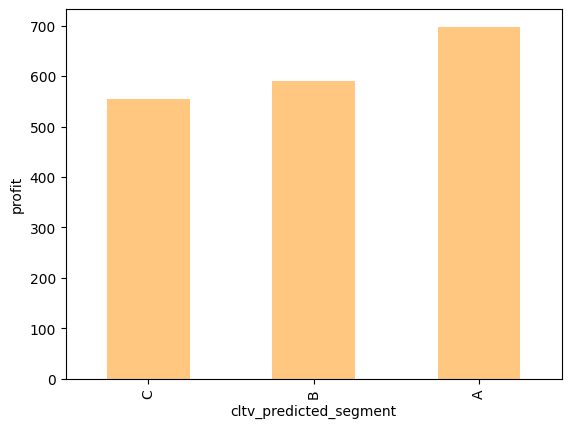

In [29]:
rfm_cltv_predicted.groupby('cltv_predicted_segment').agg('expected_average_profit').mean().plot(kind='bar', colormap='copper_r');

plt.ylabel("profit");

In [30]:
crm_final = rfm_cltv.merge(rfm_cltv_predicted, on="CustomerID", how="left")
crm_final

,Recency,Frequency,MonetaryValue,General_Segment,cltv_calculated,cltv_calculated_segment,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
CustomerID,,,,,,,,,,,,,,
2,137,2,1026.720024,VIP,5.724904,A,144.0,281.0,513.360012,20.571429,40.142857,570.977682,0.258957,A
3,230,3,2563.380028,VIP,30.453693,A,77.0,307.0,854.460009,11.000000,43.857143,915.319221,0.047155,B
7,221,2,1604.390022,VIP,12.537888,A,6.0,227.0,802.195011,0.857143,32.428571,891.117261,0.015770,C
8,127,3,800.730011,VIP,3.873705,A,94.0,222.0,266.910004,13.428571,31.714286,286.796148,0.105587,B
9,141,3,1852.870033,VIP,16.388608,A,193.0,334.0,617.623344,27.571429,47.714286,661.966644,0.360478,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,1,161.869995,VIP,1.117128,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20754,1,1,172.660004,VIP,1.133308,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20755,1,1,314.640015,VIP,1.443437,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
crm_final.sort_values(by="monetary_avg", ascending=False).head(10)

,Recency,Frequency,MonetaryValue,General_Segment,cltv_calculated,cltv_calculated_segment,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
CustomerID,,,,,,,,,,,,,,
5946,123,2,3416.600013,VIP,53.324383,A,120.0,243.0,1708.300007,17.142857,34.714286,1895.427931,0.924521,A
10744,122,2,3275.580005,VIP,49.094125,A,132.0,255.0,1637.790003,18.857143,36.428571,1817.275896,0.931673,A
2564,123,2,3023.620014,VIP,41.979770,A,195.0,319.0,1511.810007,27.857143,45.571429,1677.641908,1.000000,A
986,124,2,2996.069999,VIP,41.236384,A,191.0,315.0,1498.035000,27.285714,45.000000,1662.373935,0.984341,A
11435,241,2,2845.650032,VIP,37.297577,A,66.0,308.0,1422.825016,9.428571,44.000000,1579.012526,0.092271,B
10351,123,3,4081.770008,VIP,75.681614,A,84.0,208.0,1360.590003,12.000000,29.714286,1456.744420,0.524672,A
1780,219,2,2534.290070,VIP,29.788981,A,64.0,283.0,1267.145035,9.142857,40.428571,1406.459602,0.107734,B
12032,277,2,2528.740059,VIP,29.663024,A,82.0,360.0,1264.370030,11.714286,51.428571,1403.383835,0.068490,B
5533,122,2,2522.059997,VIP,29.511787,A,223.0,345.0,1261.029999,31.857143,49.285714,1399.681805,0.880795,A


In [32]:
crm_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16496 entries, 2 to 20757
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Recency                        16496 non-null  int64   
 1   Frequency                      16496 non-null  int64   
 2   MonetaryValue                  16496 non-null  float64 
 3   General_Segment                16496 non-null  object  
 4   cltv_calculated                16496 non-null  float64 
 5   cltv_calculated_segment        16496 non-null  category
 6   recency_cltv_predicted         3715 non-null   float64 
 7   T                              3715 non-null   float64 
 8   monetary_avg                   3715 non-null   float64 
 9   recency_weekly_cltv_predicted  3715 non-null   float64 
 10  T_weekly                       3715 non-null   float64 
 11  expected_average_profit        3715 non-null   float64 
 12  cltv_predicted                 3

In [33]:
crm_final.isnull().sum()

Recency                              0
Frequency                            0
MonetaryValue                        0
General_Segment                      0
cltv_calculated                      0
cltv_calculated_segment              0
recency_cltv_predicted           12781
T                                12781
monetary_avg                     12781
recency_weekly_cltv_predicted    12781
T_weekly                         12781
expected_average_profit          12781
cltv_predicted                   12781
cltv_predicted_segment           12781
dtype: int64

In [34]:
"""plt.figure(figsize=(15,7))
sns.barplot(x="cltv_calculated", y="cltv_calculated_segment", data=rfm_cltv)"""

'plt.figure(figsize=(15,7))\nsns.barplot(x="cltv_calculated", y="cltv_calculated_segment", data=rfm_cltv)'

# 
Let's remember required formulas for Customer Lifetime Value Calculation
- Average_Order_Value = Total_Revenue / Total_Number_of_Orders
- Purchase_Frequency = Total_Number_of_Orders / Total_Number_of_Customers
- Customer_Value(CV) = Average_Order_Value * Purchase_Frequency
- Churn_Rate = 1 - Repeat_Rate
- Profit_margin
- CLTV = (Customer_Value / Churn_Rate) x Profit_margin.
For CV calculation AOV and Frequency is required

Average Order Value = Total Revenue / Total Number of Orders

AOV Calculation:

# Repeat Rate & Churn Rate
If total transaction is bigger than 1 means that these customers were here more than once For repeat rate, the value where the total transaction is greater than 1 is selected.

Repeat Rate = Number of customers who have purchased more than once / Number of Customers

The churn rate, also known as the customer churn, is the rate at which customers stop doing business with an instution.

Formula for the calculation of churn rate: churn_rate = 1- repeat_rate

# Profit Margin
Here for this problem profit margin is chosen as 5%, actually the calculated value here can be called as Profit However it can be named as profit margin in order not to confuse the formulas.
Calculate Customer Lifetime Value
Customer value (CV) is calculated by using average order value and purchase frequency. Then by using CV, profit margin and churn rate CLTV is calculated.

In [35]:
"""top_pr= r.sort_values(by="Order Item Quantity",ascending=False).head(10)

sns.barplot(x="Category Name", y="Order Item Quantity", data=top_pr)
plt.xticks(rotation=90)
plt.show()"""

'top_pr= r.sort_values(by="Order Item Quantity",ascending=False).head(10)\n\nsns.barplot(x="Category Name", y="Order Item Quantity", data=top_pr)\nplt.xticks(rotation=90)\nplt.show()'

# Customer Lifetime Value
Customer lifetime value (CLV), a term sometimes used interchangeably with customer lifetime value, is the prediction of a company's net profit contributed to its overall future relationship with a customer. The model can be simple or sophisticated, depending on how complex the predictive analytics techniques are.

Lifetime value is a critical metric because it represents the maximum amount that customers may be expected to spend in order to acquire new ones. As a result, it's crucial in determining the payback of marketing expenses used in marketing mix modeling.

Definition of CLTV
The present value of the future cash flows attributed to the customer during his/her entire relationship with the company.!

This account represents a single time period. It represents the time when the analysis was done. Let me give such a projection that we can evaluate the issue with 3-month and 6-month projections.

How can I make my inference? We will realize lifetime value with medium and long-term projections for individuals by including the specific pattern of the whole population, by extracting the conditional probability distribution, and generalizing them in terms of the characteristics of a particular individual.

Formula
Probabilistic lifetime value estimation with time projection

CLTV =( Customer Value / Churn Rate) * Profit Margin

Customer Value = Purchase Frequency * Average Order Value

CLTV = Expected Number of Transaction * Expected Average Profit

Above, purchase frequency and number of transaction mean the same thing. Likewise, Average Order Value and Average Profit mean the same thing. It differs with the Expected part that happens to them.

# CAUTION:
It will add a probabilistic distribution. Expected statement refers to this part. Expected number of purchases, expected profitability.

BG / NBD = Expected Transaction
Gamma Gamma = Expected Profit
So How Do We Do That?
We will add statistics and probability pattern to the above formula. There will be BG / NBD and Gamma Gamma models that will make this happen to us. These models will do such a thing that they will model the purchasing behavior of all customers of this company, after modeling the purchasing behavior of all customers, they will replace the individual's personal characteristics in this model and reduce the expected number of sales to the person from the general audience pattern.

BG NBD and Gamma Gamma models are statistical models, not machine learning models. In fact, these models have the expression "Conditional" at the beginning.

# 
Preparation-Data Structure of CLTV

recency: the difference between the customer's last purchase and his first purchase

T: the age of the client in the company

frequency: total number of repeat purchases

monetary_value: average earnings per purchase

# 
BG-NBD Model
BG / NBD (Beta Geometric / Negative Binominal Distribution) = Expected Number of Transaction

Buy Till You Die
The BG/NBD Model probabilistically models two processes for the Expected Number of Transaction.

Transaction Process (Buy) + Dropout Process (Till You Die)

Transaction Process (Buy)
As long as it is alive, the number of transactions to be performed by a client in a given time period is poisson distributed with the transaction rate parameter.
As long as a customer is alive, they will continue to make random purchases around their transaction rate.
Transaction rates vary according to each customer. They are gamma dispersed for the entire audience (r, a).
So the buy process of the BG/NBD model indicates; I am modeling the purchasing activity of the whole audience with the gamma distribution.

Dropout Process (Till You Die)
Each customer has a dropout rate (dropout probability) with probability p.
A customer drops with a certain probability after making a purchase. This is not a full churn, it may return after a certain time.
Dropout rates vary for each client and beta is distributed for the entire audience (a, b).

# 